In [ ]:
!pip install yahoo_fin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 81 kB 3.9 MB/s 
     |████████████████████████████████| 83 kB 1.3 MB/s 
     |████████████████████████████████| 127 kB 60.4 MB/s 
     |████████████████████████████████| 112 kB 63.8 MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=8a647af9ba9e8d9a00d70195dd075b280654ab6d4f575fb6ec09df8c83d890dd
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=8a22d9e7672667ebc7e2b908f9038136d10f0aa2de1b3f85e97b3c7ea9d895ad
  Stored in directory: /root/.cache/pip/wheels/9c/aa/cc/f2228050ccb40f22144b073f15a2c84f11204f29fc0dce028e
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6066 sha256=b04e3fa53c633fbd272b4820cc7ba6c80e86e0ce9f8773e01ed31

In [ ]:
from yahoo_fin import stock_info as si
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
models_folder = '/content/drive/MyDrive/Models'
model_version = len(os.listdir(models_folder)) + 1
model_version

11

In [ ]:
df = {}
df = si.get_data('NG=F')
df = pd.DataFrame(df)
df = df [['open', 'close', 'high', 'low']].round(3)
df = df.resample('1D').mean()
df.interpolate(method='linear', axis = 0, inplace= True, limit_direction='forward')

In [ ]:
df.corr()

,open,close,high,low
open,1.000000,0.997653,0.998694,0.998890
close,0.997653,1.000000,0.998851,0.998906
high,0.998694,0.998851,1.000000,0.998251
low,0.998890,0.998906,0.998251,1.000000


In [ ]:
df_wk = df.resample('1M').mean()
print(df_wk)


                open     close      high       low
2000-08-31  4.735000  4.792500  4.842500  4.685000
2000-09-30  5.088056  5.122239  5.192406  5.023556
2000-10-31  5.112366  5.069688  5.183495  4.985914
2000-11-30  5.727667  5.800333  5.904333  5.656833
2000-12-31  8.755887  8.706976  9.043290  8.406048
...              ...       ...       ...       ...
2022-04-30  6.648472  6.721633  6.951917  6.474383
2022-05-31  8.134962  8.117871  8.456113  7.789629
2022-06-30  7.707600  7.597100  7.955067  7.341700
2022-07-31  7.016919  7.132629  7.379823  6.825403
2022-08-31  7.966800  7.976900  8.194300  7.694100

[265 rows x 4 columns]


In [ ]:
df_wk['std'] = df_wk['close'].rolling(10).std()

In [ ]:
df_wk = df_wk[9:]

In [ ]:
df_wk['std'].isna().sum()

0

In [ ]:
df_wk['close_max'] = df_wk['close'] + df_wk['std']
df_wk['close_mim'] = df_wk['close'] - df_wk['std']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_wk['gradient'] = np.gradient(df_wk['close'])
df_wk['d_gradient'] = np.gradient(df_wk['gradient'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_wk.drop(columns=['open', 'low','high','std'],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_wk

,close,close_max,close_mim,gradient,d_gradient
2001-05-31,4.217532,5.642656,2.792409,-0.421032,-0.107306
2001-06-30,3.796500,5.328468,2.264532,-0.528339,-0.004181
2001-07-31,3.160855,4.884609,1.437101,-0.429395,0.045318
2001-08-31,2.937710,4.839914,1.035506,-0.437702,0.135520
2001-09-30,2.285450,4.391155,0.179745,-0.158355,0.348322
...,...,...,...,...,...
2022-04-30,6.721633,7.625484,5.817782,1.565419,-0.354376
2022-05-31,8.117871,9.438396,6.797346,0.437733,-1.029020
2022-06-30,7.597100,9.039993,6.154207,-0.492621,-0.123917
2022-07-31,7.132629,8.643016,5.622242,0.189900,0.668446


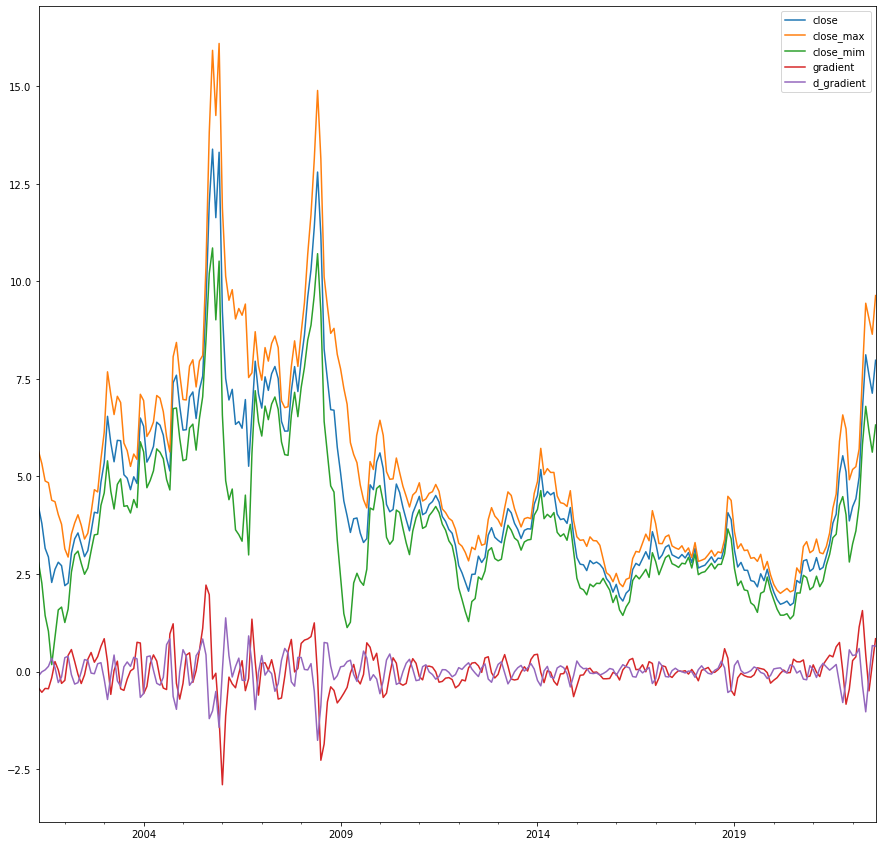

In [ ]:
plt.figure(figsize=(15,15))
for key in df_wk.keys():
  df_wk[key].plot(label=key)

plt.legend()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
scaler_mod = scaler.fit(df_wk)
scaler_mean = list(map(np.float32, scaler.mean_))
scaler_std = list(map(np.float32,scaler.scale_))
df_wk_sc = scaler.transform(df_wk)
print(scaler_mean, scaler_std)


[4.516879, 5.283167, 3.7505918, 0.015511668, 0.0060110763] [2.2293851, 2.6520727, 1.9323546, 0.51482815, 0.3566516]


In [ ]:
df_wk_sc.shape

(256, 5)

In [ ]:
def batch_gen(df, size_x = 24, size_y = 12):
  X = []
  Y = []
  for i in range(size_x, len(df) - size_y):
    X.append(df[i-size_x:i])
    Y.append([item[0] for item in df[i:i+size_y]])

  X = np.array(X)
  Y = np.array(Y)
  return  X, Y

X, Y = batch_gen(df_wk_sc, 24, 24)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=43)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(166, 24, 5)
(42, 24, 5)
(166, 24)
(42, 24)


In [ ]:
X_train.ndim

3

In [ ]:
from tensorflow import keras as k
from keras.layers import LeakyReLU, LSTM, ConvLSTM1D, Dropout, Dense, Input
from keras import backend as k_be

In [ ]:
model = k.Sequential()

In [ ]:
model.add(LSTM(50, activation=LeakyReLU(alpha=0.1), input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(50, activation=LeakyReLU(alpha=0.1), return_sequences=True))
model.add(LSTM(50, activation=LeakyReLU(alpha=0.01), return_sequences=False))
model.add(Dropout(0.20))
model.add(Dense(Y_train.shape[1]))
model.compile(loss=lambda y_true, y_pred : k_be.sqrt(k_be.mean(k_be.square(y_pred - y_true))) , optimizer= k.optimizers.Adam(learning_rate=0.01))
early_stopping = k.callbacks.EarlyStopping(monitor='loss', patience=10)
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 24, 50)            11200     
                                                                 
 lstm_22 (LSTM)              (None, 24, 50)            20200     
                                                                 
 lstm_23 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_6 (Dropout)         (None, 50)                0         
                                                                 
 dense_6 (Dense)             (None, 24)                1224      
                                                                 
Total params: 52,824
Trainable params: 52,824
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, Y_train, epochs=100, batch_size = 20, validation_split=0.2 , verbose = 1, callbacks=[early_stopping])

Epoch 1/100
7/7 [==============================] - 5s 127ms/step - loss: 2.9631 - val_loss: 0.9656
Epoch 2/100
7/7 [==============================] - 0s 45ms/step - loss: 1.0200 - val_loss: 0.9949
Epoch 3/100
7/7 [==============================] - 0s 47ms/step - loss: 1.0213 - val_loss: 0.9752
Epoch 4/100
7/7 [==============================] - 0s 40ms/step - loss: 0.9722 - val_loss: 0.8912
Epoch 5/100
7/7 [==============================] - 0s 41ms/step - loss: 0.9184 - val_loss: 0.8556
Epoch 6/100
7/7 [==============================] - 0s 42ms/step - loss: 0.8620 - val_loss: 0.7523
Epoch 7/100
7/7 [==============================] - 0s 43ms/step - loss: 0.7848 - val_loss: 0.7038
Epoch 8/100
7/7 [==============================] - 0s 42ms/step - loss: 0.7216 - val_loss: 0.6928
Epoch 9/100
7/7 [==============================] - 0s 41ms/step - loss: 0.7123 - val_loss: 0.6599
Epoch 10/100
7/7 [==============================] - 0s 45ms/step - loss: 0.6893 - val_loss: 0.6645
Epoch 11/100
7/7 [

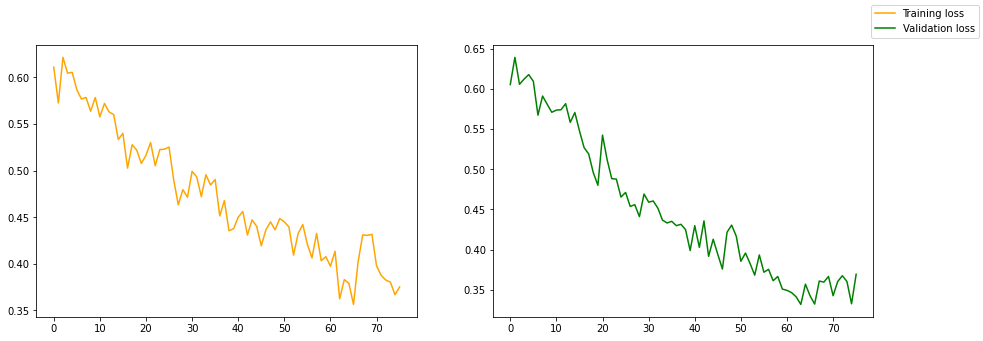

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[15,5])
ax1.plot(history.history['loss'][20:], label='Training loss', c='orange')
ax2.plot(history.history['val_loss'][20:], label='Validation loss' , c = 'green')
fig.legend()
fig.show()

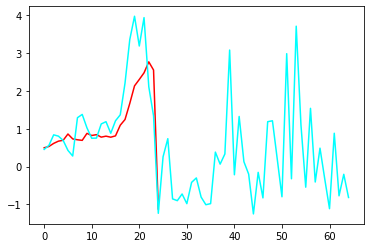

In [ ]:
pred = model.predict(X_test[0:2])
# X_test[0:2].shape
pred_arr = []
X_test[0]
for index , arr in enumerate(pred):
  if index == 0:
    pred_arr = list(arr)

  else:
    pred_arr.append(arr[-1])

plt.plot(pred_arr,c='red')
y_arr=[]


for index , arr in enumerate(Y_test[0:]):
  if index == 0:
    y_arr = list(arr)

  else:
    y_arr.append(arr[-1])

plt.plot(y_arr, c='cyan')

In [ ]:
pred=X_test[0:2]
x , p = [] ,[]
y_fin = []
for i in range(0,3):
  pred_new = model.predict(pred)
  x0 = [x[0] for x in pred[1]]
  x = [x[0] for x in pred[1]]
  p = list(pred_new[1])
  x = x0+x+p
  x = np.array(x)
  x = (scaler_std[0]* np.array(x)) + scaler_mean[0]
  y_fin = y_fin + list(x[48:])
  x = pd.DataFrame({'close': x})
  x['std'] = x['close'].rolling(10).std()
  x['close_max'] = x['close'] + x['std']
  x['close_mim'] = x['close'] - x['std']
  x['gradient'] = np.gradient(x['close'])
  x['d_gradient'] = np.gradient(x['gradient'])
  x.drop(columns=['std'], inplace=True)
  pred = np.array([x[24:48], x[48:]])
 

  

In [ ]:
y_arr = (scaler_std[0]* np.array(y_arr)) + scaler_mean[0]



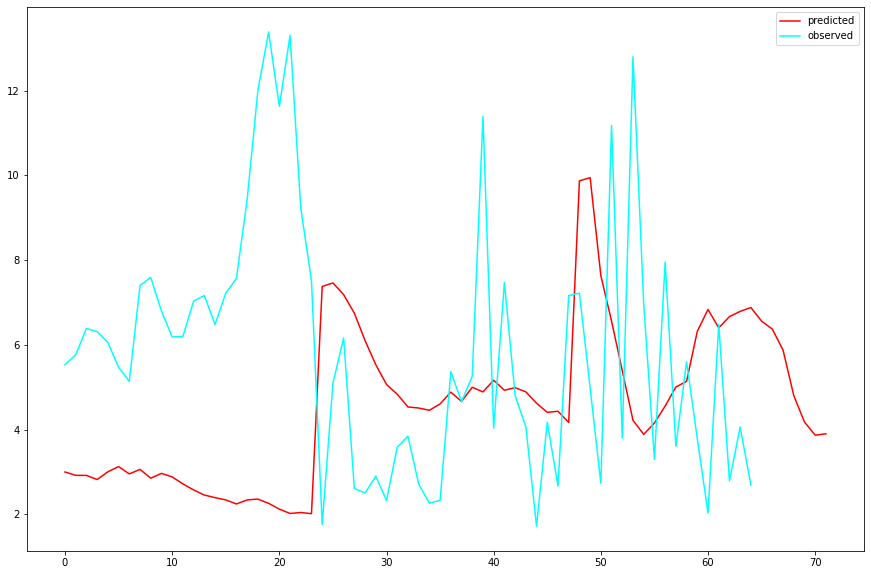

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(y_fin, label='predicted',c = 'red')
plt.plot(y_arr, label='observed', c='cyan')
plt.legend()

In [ ]:
y_arr

array([ 5.53277415,  5.7693333 ,  6.39069354,  6.31373332,  6.05739783,
        5.4729892 ,  5.14154994,  7.40222584,  7.59470005,  6.80084679,
        6.18800805,  6.19898213,  7.03388712,  7.16574447,  6.48448924,
        7.2199667 ,  7.57187101,  9.44083884, 12.00773357, 13.3853874 ,
       11.63043356, 13.30531481,  9.22754044,  7.5117679 ,  1.76193527,
        5.09527951,  6.16421665,  2.61341918,  2.50744149,  2.90348371,
        2.33083853,  3.58604019,  3.84886655,  2.7192579 ,  2.26896648,
        2.33316648,  5.37204834,  4.66197214,  5.2622555 , 11.39140881,
        4.03541925,  7.47441671,  4.80636659,  4.07216118,  1.72638689,
        4.17763323,  2.67159983,  7.16574447,  7.2199667 ,  4.98703219,
        2.7372579 , 11.17764536,  3.79956655, 12.79864472,  6.96000002,
        3.30283914,  7.9533334 ,  3.60816116,  5.60464512,  3.78472569,
        2.03469335,  6.48448924,  2.79374715,  4.06339989,  2.69588693])

In [ ]:
save_model = str(input('Do you want to save model[y/n]: '))
if save_model.lower() != 'n':
  model.save(f'/content/drive/MyDrive/Models/Model_V{model_version}.h5')


Do you want to save model[y/n]: y
